In [141]:
using Plots; gr()
using Reproduce
using FileIO
using Statistics
using ProgressMeter
using JLD2
# data_home = "../data/experiment_2/Experiment2"
# data_home = "../Experiment2_ESarsa_NoExploration"
# data_home = "../Experiment2_NoExploringStarts"
# data_home = "../Experiment2_Non_Introspective"
# data_home = "../data/Experiment2_Introspective_And_Nonintrospective"
# data_home = "../data/Experiment2_Introspective"
# data_home = "../data/Revised_Experiment2"
# data_home = "../data/OneDTMaze_Revised_RoundRobin"
data_home = "../OneDTMaze_No_Reward_GPI"

"../OneDTMaze_No_Reward_GPI"

In [142]:
include("./plot_utils.jl")
GPU = GeneralPlotUtils

Main.GeneralPlotUtils

In [143]:
# experiment_folders = ["../data/Experiment1 (copy)"]
# experiment_folders = ["../Experiment1"]
# experiment_folders = ["../data/Experiment1Final"]
experiment_folders = [data_home]

1-element Array{String,1}:
 "../OneDTMaze_No_Reward_GPI"

In [144]:
data_key = :oned_tmaze_start_error

:oned_tmaze_start_error

In [145]:
ic = ItemCollection(joinpath(experiment_folders[1], "data"));
# ic = search(ic, Dict("exploring_starts" => "beg", "num_tiles" => 2))
diff(ic)

Dict{String,Array} with 6 entries:
  "demon_alpha_init"     => [0.00625, 0.05, 0.1]
  "tiling_structure"     => [[1, 8], [2, 8], [16, 2]]
  "behaviour_alpha_init" => [0.00625, 0.05, 0.1]
  "num_tilings"          => [1, 2, 16]
  "seed"                 => [1, 2, 3, 4, 5]
  "num_tiles"            => [2, 8]

In [83]:
# length(search(ic, Dict("demon_learner" => "LSTD")))
search(ic, Dict("behaviour_learner"=>"GPI"))

ItemCollection(Size: 0, Dir Hash: 0)

In [105]:
# algo_divisor_keys = ["behaviour_learner","behaviour_update","demon_learner", "demon_opt", "demon_update", "demon_alpha_init"]
# algo_divisor_keys = ["behaviour_learner", "behaviour_update", "demon_learner", "demon_opt"]
# algo_divisor_keys = ["behaviour_learner","behaviour_reward_projector", "demon_learner","num_tiles", "exploration_param", "exploring_starts"]
algo_divisor_keys = ["tiling_structure","eta"]
# algo_divisor_keys = ["demon_learner", "demon_update", "demon_opt","demon_rep"]

# algo_divisor_keys = ["demon_learner"]
# algo_divisor_keys = ["behaviour_eta"]
# algo_divisor_keys = []
# sweep_params = ["demon_eta"]
# sweep_params = ["demon_eta", "behaviour_eta", "exploration_param"]
sweep_params = []

algo_specs_full = GPU.split_algo(ic, algo_divisor_keys)
# algo_specs_full = ic

["tiling_structure", "eta"]


15-element Array{Any,1}:
 Dict{Any,Any}("tiling_structure" => [1, 8],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [1, 8],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [1, 8],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [1, 16],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [1, 16],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [1, 16],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [2, 8],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [2, 8],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [2, 8],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [16, 2],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [16, 2],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [16, 2],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [32, 2],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [32, 2],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [32, 2],"eta" => 0.2)

In [106]:
all_algos_ics = [search(ic,algo_spec) for algo_spec in algo_specs_full]
# all_algos_ics = [search(ic,algo_specs_full)]
length.(all_algos_ics)


15-element Array{Int64,1}:
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15

In [107]:
valid_algos_ind = findall(a -> length(a) != 0, all_algos_ics)

algo_specs = algo_specs_full[valid_algos_ind]
algo_ics = all_algos_ics[valid_algos_ind]

15-element Array{ItemCollection,1}:
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)
 ItemCollection(Size: 15, Dir Hash: 0)

In [108]:
algo_specs

15-element Array{Any,1}:
 Dict{Any,Any}("tiling_structure" => [1, 8],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [1, 8],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [1, 8],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [1, 16],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [1, 16],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [1, 16],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [2, 8],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [2, 8],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [2, 8],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [16, 2],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [16, 2],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [16, 2],"eta" => 0.2)
 Dict{Any,Any}("tiling_structure" => [32, 2],"eta" => 0.008)
 Dict{Any,Any}("tiling_structure" => [32, 2],"eta" => 0.04)
 Dict{Any,Any}("tiling_structure" => [32, 2],"eta" => 0.2)

In [109]:
algo_ics[1].items

15-element Array{Reproduce.Item,1}:
 Reproduce.Item("../OneDTMaze_No_Reward_ESARSA/data/RP_0_0x12b2b4f6b36e3d22", Dict{String,Any}("tiling_structure" => [1, 8],"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"_GIT_INFO" => "0","demon_lambda" => 0.9,"behaviour_reward_projector" => "tilecoding","demon_update" => "TB","behaviour_opt" => "Auto","demon_rep" => "ideal_martha","num_tiles" => 8…), ["env_step_penalty", "logger_keys", "steps", "behaviour_learner", "exploration_param", "tiling_structure", "exploration_strategy", "use_external_reward", "horde_type", "drifter"  …  "exploring_starts", "demon_opt", "behaviour_alpha_init", "num_tilings", "intrinsic_reward", "constant_target", "seed", "demon_discounts", "demon_policy_type", "behaviour_rp_tilings"])
 Reproduce.Item("../OneDTMaze_No_Reward_ESARSA/data/RP_0_0x18056e027290b233", Dict{String,Any}("tiling_structure" => [1, 8],"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"_GIT_INFO" => "0",

In [110]:
best_per_algo_ics = []
include("./plot_utils.jl")
GPU = GeneralPlotUtils
for (i,algo_ic) in enumerate(algo_ics)
    println(i)
#     push!(best_per_algo_ics, GPU.get_best(algo_ic,sweep_params, data_key))
    push!(best_per_algo_ics, GPU.get_best_final_perf(algo_ic,sweep_params, data_key, 0.1))

end

1


Any[]
[3.0358713754621207]
2
Any[]
[3.1922411329239018]
3
Any[]
[3.4954972944524916]
4
Any[]
[3.1947787802465784]
5
Any[]
[3.353218906622826]
6
Any[]
[3.4300333908712504]
7
Any[]
[3.0360002419826495]
8
Any[]
[2.795278846199187]
9
Any[]
[3.1358827699424965]
10
Any[]
[2.906906610269418]
11
Any[]
[3.42036487574607]
12
Any[]
[3.154236714298142]
13
Any[]
[3.4358810658030587]
14
Any[]
[3.078122507222666]
15
Any[]
[3.3507389047950373]


In [111]:
length.(best_per_algo_ics)

15-element Array{Int64,1}:
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15
 15

In [112]:
data = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[1],10) for ic in best_per_algo_ics]
std = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[2],10) for ic in best_per_algo_ics]

size(GPU.load_results(best_per_algo_ics[1], data_key))
# GVF x timesteps x num_runs
# tst = GPU.load_results(best_per_algo_ics[1], data_key)
# size(tst)
# std(sum(tst,dims=1)[1,:,:], dims =2)
# methods(std)
# std(tst,dims=3)
# GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key))[2]

(4, 501, 15)

In [113]:
#Accidentally ran TabularRoundRobin at twice the loging frequency
# println(length(data[7]))

# if length(data[7]) > 300
#     odd_inds = [i for i in 1:2:length(data[6])]
# #     @show data[7]
#     data[7] = data[7][odd_inds]
#     std[7] = std[7][odd_inds]
# end

In [114]:
algo_specs
[GPU.print_params(algo, algo_divisor_keys, sweep_params) for algo in best_per_algo_ics]

For IC: 
tiling_structure  [1, 8]
eta  0.008

For IC: 
tiling_structure  [1, 8]
eta  0.04

For IC: 
tiling_structure  [1, 8]
eta  0.2

For IC: 
tiling_structure  [1, 16]
eta  0.008

For IC: 
tiling_structure  [1, 16]
eta  0.04

For IC: 
tiling_structure  [1, 16]
eta  0.2

For IC: 
tiling_structure  [2, 8]
eta  0.008

For IC: 
tiling_structure  [2, 8]
eta  0.04

For IC: 
tiling_structure  [2, 8]
eta  0.2

For IC: 
tiling_structure  [16, 2]
eta  0.008

For IC: 
tiling_structure  [16, 2]
eta  0.04

For IC: 
tiling_structure  [16, 2]
eta  0.2

For IC: 
tiling_structure  [32, 2]
eta  0.008

For IC: 
tiling_structure  [32, 2]
eta  0.04

For IC: 
tiling_structure  [32, 2]
eta  0.2



15-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [115]:
label_keys = cat(algo_divisor_keys,sweep_params, dims = 1)
labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
labels = cat(labels..., dims=2)

1×15 Array{String,2}:
 " [1, 8] 0.008"  " [1, 8] 0.04"  …  " [32, 2] 0.04"  " [32, 2] 0.2"

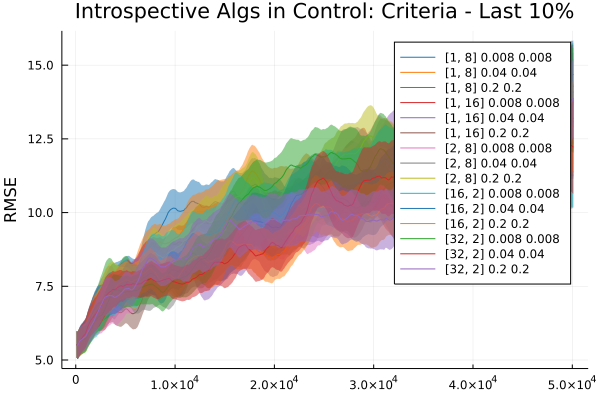

In [95]:
# labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
ylabel = "RMSE"
# title = "SR Demons & Step Size Adaptation vs More Naive Approaches"
title = "Introspective Algs in Control: Criteria - Last 10%"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
num_runs = 30
plot(xticks, data, ylabel=ylabel, palette=:tab10, label= labels, grid=true, ribbon = std/sqrt(num_runs), legend=:topright, title=title)

In [ ]:
savefig("./plots/onedtmaze_roundrobin/rmse.png")

In [116]:
data_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf = true)[1] for ic in best_per_algo_ics]
std_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf = true)[2] for ic in best_per_algo_ics]

15-element Array{Array{Float64,2},1}:
 [1.1491900087240784e-16 1.1491900087240784e-16 … 1.1491900087240784e-16 1.1491900087240784e-16; 1.4395668215150275 1.4395668215150275 … 1.4395668215150275 1.4395668215150275; 5.745950043620392e-17 0.3273374379957775 … 6.875726259167259 6.907937009920008; 1.6354751553209372 1.6354751553209372 … 1.6354751553209372 1.6354751553209372]
 [1.1491900087240784e-16 1.1491900087240784e-16 … 1.1491900087240784e-16 1.1491900087240784e-16; 1.4395668215150277 1.4395668215150277 … 1.4395668215150277 1.4395668215150277; 5.745950043620392e-17 0.3273374379957775 … 4.678730234416086 4.519822022752155; 1.6354751553209375 1.6354751553209375 … 1.6354751553209375 1.6354751553209375]
 [1.1491900087240784e-16 1.1491900087240784e-16 … 1.1491900087240784e-16 1.1491900087240784e-16; 1.4395668215150275 1.4395668215150275 … 1.4395668215150275 1.4395668215150275; 5.745950043620392e-17 0.3273374379957775 … 5.4788914490155785 5.5199683312262104; 1.6354751553209372 1.6354751553209

In [117]:
std_per_gvf[1][1,:]

501-element Array{Float64,1}:
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 ⋮
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16
 1.1491900087240784e-16

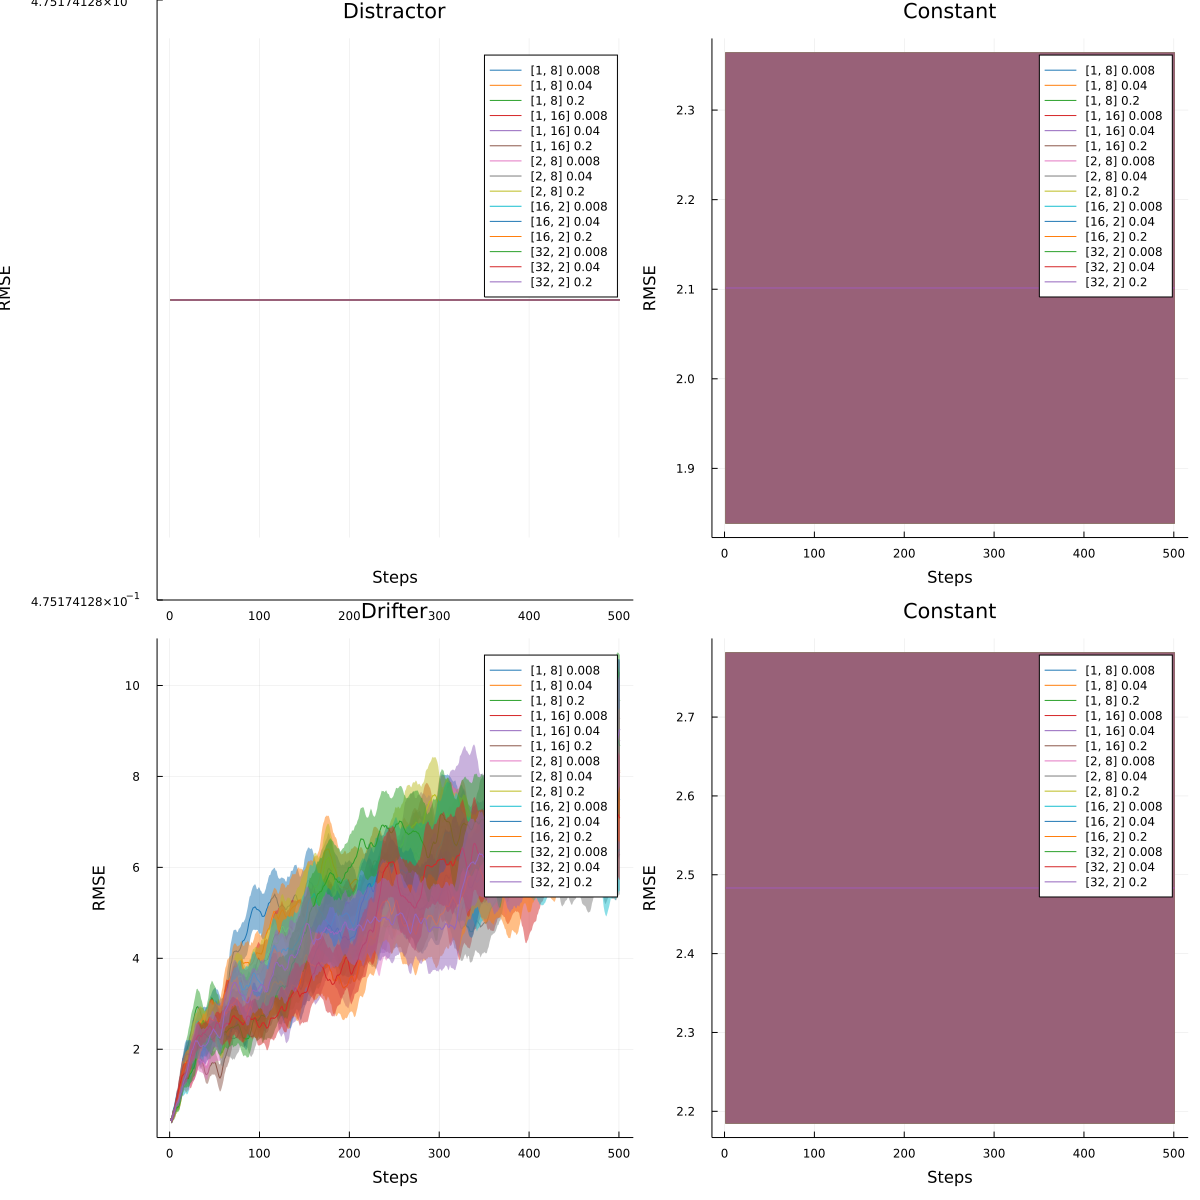

┌ Warning: No strict ticks found
└ @ PlotUtils /home/matthewmcleod/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283
┌ Warning: No strict ticks found
└ @ PlotUtils /home/matthewmcleod/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283


In [118]:
num_gvfs = 4
ps = []
gvf_labels = ["Distractor" "Constant" "Drifter" "Constant"]
for gvf_ind in 1:num_gvfs
    p = plot()
    for algo_ind in 1:length(data_per_gvf)
        smooth_gvf = GPU.smooth(data_per_gvf[algo_ind][gvf_ind,:],5)
        plot!(p,smooth_gvf, palette=:tab10, ribbon = std_per_gvf[algo_ind][gvf_ind,:] / sqrt(30), size = (500,500),label = labels[algo_ind])
        plot!(xlabel="Steps", ylabel = "RMSE",  title = gvf_labels[gvf_ind])
    end
    push!(ps,p)
end
plot(ps..., layout=(2,2), size = (1200,1200))
        

In [ ]:
savefig("./plots/onedtmaze_roundrobin/rmse_per_demon.png")

In [ ]:
epag = [GPU.load_results(ic,data_key) for ic in best_per_algo_ics]
epag[1]
for (algo_ind,tmp) in enumerate(epag)
    num_runs = size(tmp)[3]
    ps = []
    for gvf_ind in 1:num_gvfs
        p = plot()
        for i in 1:num_runs
            plot!(tmp[gvf_ind,:,i],linealpha=0.3,label="",color=:black)
        end
        plot!(data_per_gvf[algo_ind][gvf_ind,:], label = labels[algo_ind])
        title!(gvf_labels[gvf_ind])
        push!(ps,p)
    end
    plot(ps...)
#     savefig("./plots/onedtmaze_roundrobin/rmse_per_run_$(labels[algo_ind]).png")
end

    

In [ ]:
ps = []
inds_to_care = [1:4,5:8,9:13,14:18]
for inds in inds_to_care
    ylabel = "RMSE"
    title = ""
    step_increment=100
    num_samples = length(data[1])
    xticks=collect(step_increment:step_increment:num_samples*step_increment)
    num_runs = 50
    ribbon_std_err = std[inds] / sqrt(num_runs)
    p = plot(xticks, data[inds], ylabel=ylabel, palette=:tab10, label= labels[:,inds], grid=true, ribbon = ribbon_std_err, legend=:topright, title=title)
    push!(ps,p)
end
plot(ps..., size = (800,800))

In [ ]:
savefig("./plots/experiment_2_revised/introspective_metastepsize_longer.png")

In [ ]:
#Replicating plot from Experiment 1.
# inds_to_replicate = [1,3,4,8]
inds_to_replicate = [6,8]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]
@show length(std)
label_subset

In [ ]:
# title = "High vs Low Alpha Init"
title = "SR Learners"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,8))

In [ ]:
savefig("./plots/onedtmaze_roundrobin/SR_learners.png")

In [ ]:
for e in diff(ic)["exploration_param"]
    @show e
end

In [ ]:
inds_to_replicate = [5,6,7]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]

In [ ]:
title = "Behaviour Learned vs Round Robin"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
p1 = plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,4))

start_pos = 150
new_x_ticks = collect(step_increment * start_pos:step_increment:num_samples*step_increment)
data_subset_cut = [s[start_pos:end] for s in data_subset]
std_subset_cut = [s[start_pos:end] for s in std[inds_to_replicate]/sqrt(30)]
p2 = plot(new_x_ticks,data_subset_cut, ribbon = std_subset_cut, title="Cut at $(step_increment * start_pos)")

plot(p1,p2, layout = (2,1), figsize=(20,20))


In [ ]:
savefig("./plots/experiment2/learned_vs_round_robin.png")

In [119]:
episode_lengths = [GPU.load_results(ic,:episode_length, return_type = "array") for ic in best_per_algo_ics]
visit_orders = [GPU.load_results(ic,:visit_order, return_type = "array") for ic in best_per_algo_ics]

15-element Array{Array{Any,1},1}:
 [[2, 3, 3, 1, 3, 4, 3, 4, 3, 4  …  3, 3, 3, 3, 3, 3, 3, 4, 3, 3], [3, 1, 4, 1, 4, 1, 3, 1, 4, 3  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [2, 3, 2, 4, 4, 4, 3, 2, 4, 3  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 4, 1, 3, 1, 4, 1, 1, 3, 3  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [4, 2, 4, 1, 3, 4, 3, 1, 4, 3  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [2, 3, 3, 4, 2, 3, 4, 3, 1, 4  …  3, 4, 3, 3, 3, 3, 3, 3, 3, 3], [3, 1, 3, 2, 3, 4, 4, 2, 4, 2  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [2, 4, 1, 3, 4, 4, 3, 3, 3, 4  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 4], [3, 4, 1, 4, 3, 2, 3, 1, 1, 4  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [3, 4, 1, 3, 4, 3, 2, 4, 3, 4  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [2, 3, 4, 2, 4, 4, 2, 4, 4, 4  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1, 4, 3, 4, 2, 3, 4, 3, 1, 3  …  4, 4, 4, 4, 4, 4, 4, 4, 3, 4], [1, 3, 4, 3, 2, 2, 4, 4, 3, 4  …  3, 3, 3, 4, 4, 4, 4, 4, 4, 4], [3, 1, 3, 4, 1, 4, 1, 3, 4, 4  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 4, 2, 4, 2, 4, 2, 2, 3, 3  …  3, 3, 3, 3, 3, 3, 3,

In [120]:
length(visit_orders[1][7])
# length(episode_lengths[1][7])

2374

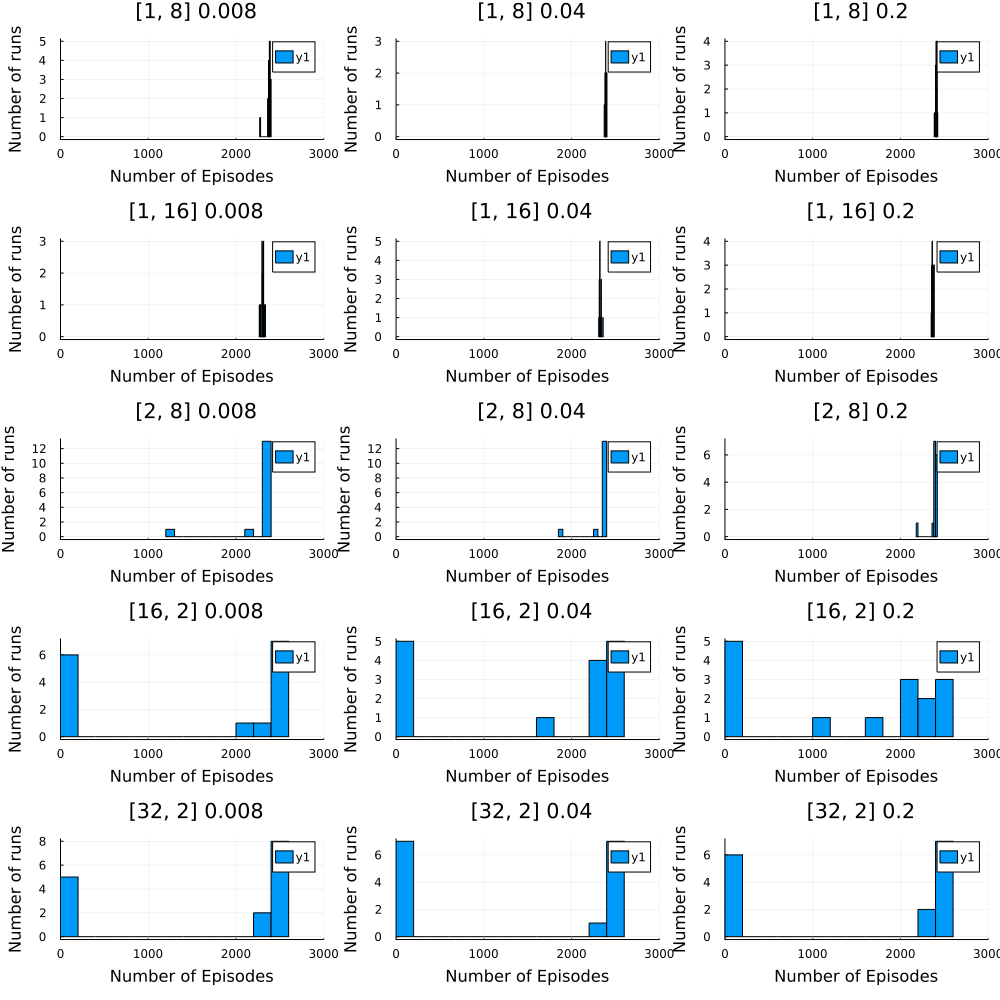

In [129]:
ps = []
for ind in 1:length(episode_lengths)
    num_episodes = [length(e) for e in episode_lengths[ind]]
#     bins = (1:10,11:100,101:300,301:1000,1001:10000)
#     bins = 1:10:100
#     @show sum(num_episodes), labels[ind]
#     p = histogram(num_episodes; bins)
    p = histogram(num_episodes; nbins=15, xlim=(0,3000))
#     p = histogram(num_episodes; nbins=15)

    title!(labels[ind])
    push!(ps,p)
    xlabel!("Number of Episodes")
    ylabel!("Number of runs")
end

plot(ps..., layout = (5,3), size = (1000,1000))

In [130]:
savefig("./plots/no_reward/esarsa_episode_length.png")

In [131]:
data_per_run = [GPU.load_results(ic,data_key) for ic in best_per_algo_ics]
data_per_run[1]

4×501×15 Array{Float64,3}:
[:, :, 1] =
 0.475174  0.475174  0.475174  0.475174  …  0.475174  0.475174  0.475174
 0.29298   0.29298   0.29298   0.29298      0.29298   0.29298   0.29298
 0.468106  0.178525  0.359307  0.181734     0.754125  0.11224   0.0921712
 2.53037   2.53037   2.53037   2.53037      2.53037   2.53037   2.53037

[:, :, 2] =
 0.475174  0.475174  0.475174  0.475174  …  0.475174  0.475174  0.475174
 3.01463   3.01463   3.01463   3.01463      3.01463   3.01463   3.01463
 0.468106  0.484801  0.782841  1.39024      2.0463    2.10304   1.77183
 1.41566   1.41566   1.41566   1.41566      1.41566   1.41566   1.41566

[:, :, 3] =
 0.475174  0.475174  0.475174  0.475174  …  0.475174  0.475174  0.475174
 0.400585  0.400585  0.400585  0.400585     0.400585  0.400585  0.400585
 0.468106  0.328545  0.335272  0.38422      4.91157   4.22299   3.75905
 0.19129   0.19129   0.19129   0.19129      0.19129   0.19129   0.19129

...

[:, :, 13] =
 0.475174  0.475174  0.475174  0.475174  …  0.

In [54]:
for ind in 1:length(data_per_run)
    ps = []
    d = data_per_run[ind]
    for gvf_i in 1:4
        p = plot(d[gvf_i,:,:], linecolor=:blue, linealpha=0.3, label = "")
        plot!(mean(d[gvf_i,:,:], dims = 2), linewidth=5, label = "")
        title!(string(gvf_labels[gvf_i], " ", labels[ind]))
        push!(ps,p)
    end
    full_p = plot(ps..., size = (800,800))
    display(full_p)
#     savefig("./plots/onedtmaze_revised/RMSE_per_run_$(labels[ind])_esarsa.png")
end


LoadError: [91mUndefVarError: gvf_labels not defined[39m

In [55]:
maximum([e[end-1] for e in episode_lengths[2]])

23

In [56]:
max_lengths = [GPU.get_min_length(arrs)-1 for arrs in episode_lengths]


4-element Array{Int64,1}:
 2274
 1860
    2
    2

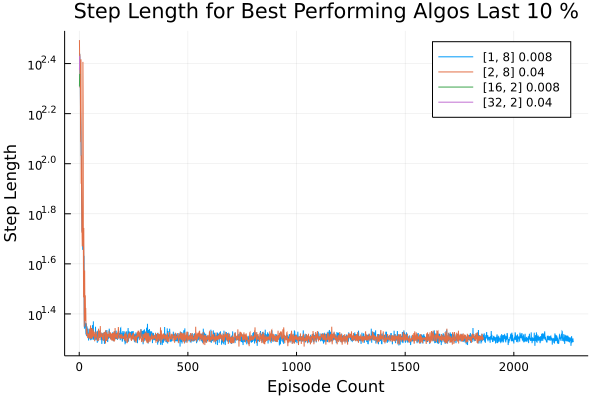

In [57]:
p = plot(xlabel = "Episode Count", ylabel = "Step Length")
for (ind,episode_lengths) in enumerate(episode_lengths)
    l = hcat([epi[1:max_lengths[ind]] for epi in episode_lengths]...)
    plot!(p,mean(l,dims=2), label = labels[ind],yaxis=:log)
end
title!("Step Length for Best Performing Algos Last 10 %")
# p = plot(mean(episode_lengths,dims=2), xlabel="Episode Count", ylabel="Step Length", hline=5.5)
display(p)
# savefig("./plots/no_reward/step_length.png")

In [ ]:
ps = []
for (algo_ind,algo) in enumerate(episode_lengths)
    p = plot()
    num_runs = length(algo)
    num_steps = cumsum(algo[1])[end]
    d = zeros(num_runs, num_steps)
    for (i,run) in enumerate(algo)
        cur_index = 1
        for (ep_num,ep) in enumerate(run)
            d[i,cur_index:cur_index + ep-1] .= ep
            cur_index += ep
        end            
#             @show d[i,:]
            plot!(d[i,:],color=:black, linealpha=0.4, label="")
    end
    plot!(mean(d,dims=1)', label = labels[algo_ind], yaxis=:log, size=(1000,1000), legend=:bottomleft)
    xlabel!("Step")
    ylabel!("Ave Ep Length at Step")
    push!(ps, p)
    
end

plot(ps...)
        

In [ ]:
savefig("./plots/no_reward/ep_length_per_step.png")

In [ ]:
# include("./plot_utils.jl")
# GPU = GeneralPlotUtils
gvf_labels = ["Distractor" "Constant" "Drifter" "Constant"]

In [ ]:
ps = []
for i in 1:length(visit_orders)
    @show max_lengths[i]
    @show length(visit_orders[i])
    visit_perc = GPU.goal_visits_per_episode(visit_orders[i], max_lengths[i])
    @show size(visit_perc)
#     @show size(GPU.smooth(visit_perc, 5))
#     if size(visit_perc)[2] != 0
#         smooth_visit_perc = GPU.smooth(visit_perc, 5)
#     end
    tmp = [GPU.smooth(visit_perc[i,:],20) for i in 1:4] 
    p = plot(tmp, labels = gvf_labels, xlabel="Episode Count", ylabel="Fraction of Goal Visits", ylim=(0.0,1.0), title = string(labels[i], " Last 10%"), xaxis=:log, size = (800,1200), legend=:topleft)
    push!(ps,p)
end
println()
@show length(visit_orders)
# plot(ps..., layout = (1,3))
# display(plot(ps...,layout = (2,1)))
# display(plot(ps...))
display(plot(ps..., layout=(2,2)))
# savefig("./plots/onedtmaze_revised/goal_visits.png")

In [ ]:
tmp_lengths = [length.(visits) for visits in visit_orders]
med_visit_order_lengths = Int.(floor.([median(l) for l in tmp_lengths]))
med_visit_mask = [tmp_lengths[i] .> med_visit_order_lengths[i] for i in 1:length(visit_orders)]
med_visit_order_lengths

In [ ]:

ps = []
for i in 1:length(visit_orders)
    visit_perc = GPU.goal_visits_per_episode(visit_orders[i][med_visit_mask[i]], med_visit_order_lengths[i])
    tmp = [GPU.smooth(visit_perc[i,:],100) for i in 1:4] 
    p = plot(tmp, labels = gvf_labels, xlabel="Episode Count", ylabel="Fraction of Goal Visits", ylim=(0.0,1.0), title = string("MEDIAN",labels[i], " Last 10%"), size = (800,1200), legend=:topleft)
    push!(ps,p)
end
println()
@show length(visit_orders)
display(plot(ps..., layout=(1,2)))
# savefig("./plots/onedtmaze_revised/goal_visits_MEDIAN.png")

In [140]:
tmpind = 13
for i in 1:length(visit_orders[tmpind])
    println(i)
    histogram(visit_orders[tmpind][i], title=string(labels[tmpind], " seed $(i)", " Last visit: $(visit_orders[tmpind][i][end])"), yaxis=:log)
    savefig("./plots/no_reward/goal_visitations_seed_$(i).png")
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [135]:
@show length(visit_orders)

length(visit_orders) = 15


15

In [ ]:
irs = [GPU.load_results(ic,:intrinsic_reward) for ic in best_per_algo_ics]

p = plot()
for (i,ir) in enumerate(irs)
    @show size(ir)
    l = mean(ir[:,1,:], dims=2)
    l = GPU.smooth(l,5)
    plot!(l,label=labels[:,i], palette=:tab10)
end
title!("Intrinsic Reward")
xlabel!("Steps (per 100)")
ylabel!("Intrinsic Reward")
display(p)
    

In [ ]:
savefig("./plots/onedtmaze_roundrobin/intrinsic_reward_q.png")

In [ ]:
num_gvfs = 4
ps = []
for i in 1:length(visit_orders)
    visitation = zeros(num_gvfs, num_gvfs)
    for run in 1:length(visit_orders[i])
        if length(visit_orders[i][run]) != 0
            first_visit = visit_orders[i][run][1]
#         @show first_visit
            goals = unique(visit_orders[i][run])
#         @show goals
            visitation[first_visit,goals] .+= 1
        end
    end
    @show maximum(visitation,dims=2)
    visitation = visitation ./ vec(maximum(visitation,dims=2))
    push!(ps, heatmap(visitation, title = labels[i], size = (1000,1300), c = :grayC))

end
plot(ps..., layout=(2,2))

In [ ]:
data_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[1] for ic in best_per_algo_ics]
std_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[2] for ic in best_per_algo_ics]

In [ ]:
GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key), per_gvf=true)[2]

In [ ]:
data[1] .== data[3]

In [ ]:
inds_to_replicate

In [ ]:
ps = []
for ind in inds_to_replicate
    label_subset = labels[:,ind]
    data_subset = data_per_gvf[ind]
    std_subset = std_per_gvf[ind]
    @show size(std_subset)
    xticks=collect(step_increment:step_increment:num_samples*step_increment)
    p = plot(xticks,data_subset',label= ["Distractor" "Const" "Drifter" "Const"], ribbon = (std_subset/sqrt(100))', legend=:bottomleft, title=labels[ind], ylims=(0,1.25))
    push!(ps,p)
end

In [ ]:
plot(ps..., layout=(2,2))

In [ ]:
savefig("./plots/TabTMazeRoundRobin_per_gvf.png")

In [80]:
# GPU.load_results(ic,:max_behaviour_q)
max_qs = [GPU.load_results(ic,:max_behaviour_q, return_type="array") for ic in best_per_algo_ics]

ps = []
for i in 1:length(best_per_algo_ics)
    p = plot()
    tmp = mean(cat([q for q in max_qs[i]]..., dims = 2), dims =2)
    @show minimum(tmp)
    plot!(tmp, size = (500,500))
    ylabel!(" Max Q value")
    xlabel!("steps")
    push!(ps, p)
end
plot(ps..., size = (1000,1000))

minimum(tmp) = -8.330807768046757
minimum(tmp) = -8.675989325740993
minimum(tmp) = -8.436376290081487
minimum(tmp) = -9.262296021291231
minimum(tmp) = -9.280475460346615


In [ ]:
savefig("./plots/no_reward/max_q.png")

In [ ]:
plot(ones(2,10))